### Loading useful Modules

In [133]:
import pandas as pd
from scipy.io import arff
import numpy as np
import math
import operator

### Loading Train and Test Datasets

In [135]:
data=arff.loadarff("./product-selection/trainProdSelection.arff")
trainDF = pd.DataFrame(data[0])
data=arff.loadarff("./product-selection/testProdSelection.arff")
testDF = pd.DataFrame(data[0])

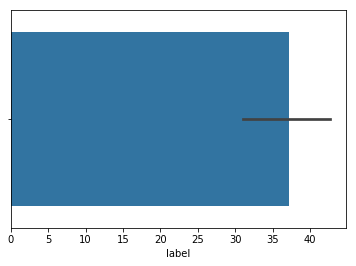

In [185]:
import seaborn as sns
sns.barplot(trainDF['label'].value_counts())

In [187]:
trainDF['label'].value_counts()

C4    47
C3    41
C1    36
C5    36
C2    26
Name: label, dtype: int64

### Encoding string based series in Training Set to UTF-8


In [136]:
trainDF.Type=trainDF.Type.str.decode("UTF-8")

In [137]:
trainDF.LifeStyle=trainDF.LifeStyle.str.decode("UTF-8")

In [138]:
trainDF.label=trainDF.label.str.decode("UTF-8")

### Normalization

In [139]:
minValue=trainDF.Vacation.min()
maxValue=trainDF.Vacation.max()
trainDF.Vacation=trainDF.Vacation.apply(lambda x:(x-minValue)/(maxValue-minValue))


In [140]:
minValue=trainDF.eCredit.min()
maxValue=trainDF.eCredit.max()
trainDF.eCredit=trainDF.eCredit.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [141]:
minValue=trainDF.salary.min()
maxValue=trainDF.salary.max()
trainDF.salary=trainDF.salary.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [142]:
minValue=trainDF.property.min()
maxValue=trainDF.property.max()
trainDF.property=trainDF.property.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [143]:
trainDF.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,0.079365,0.107558,0.219960,0.183167,C1
1,student,spend>saving,0.158730,0.052326,0.293102,0.112797,C1
2,student,spend>saving,0.095238,0.177326,0.346023,0.174200,C1
3,student,spend>saving,0.031746,0.127907,0.309882,0.189984,C1
4,student,spend>saving,0.222222,0.020349,0.363663,0.127311,C1


### Encoding string based series in Test Set to UTF-8


In [144]:
testDF.Type=testDF.Type.str.decode("UTF-8")

In [145]:
testDF.LifeStyle=testDF.LifeStyle.str.decode("UTF-8")

In [146]:
testDF.label=testDF.label.str.decode("UTF-8")

### Normalization


In [147]:
minValue=testDF.Vacation.min()
maxValue=testDF.Vacation.max()
testDF.Vacation=testDF.Vacation.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [148]:
minValue=testDF.eCredit.min()
maxValue=testDF.eCredit.max()
testDF.eCredit=testDF.eCredit.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [149]:
minValue=testDF.salary.min()
maxValue=testDF.salary.max()
testDF.salary=testDF.salary.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [150]:
minValue=testDF.property.min()
maxValue=testDF.property.max()
testDF.property=testDF.property.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [151]:
testDF.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend<saving,0.20,0.058824,0.104637,0.398926,C1
1,student,spend>>saving,0.54,0.021008,0.175059,0.243041,C1
2,student,spend<<saving,0.52,0.231092,0.138339,0.085992,C1
3,engineer,spend>saving,0.26,0.151261,0.430086,0.116229,C1
4,librarian,spend<saving,0.00,0.016807,0.352657,0.025714,C1


### Calculating Distance between two datapoints 

In [152]:
def eDistance(row1, row2, length):
    distance = 0
    for i in range(2):
        if (row1[i]==row2[i]):
            distance += pow((1), 2)
    for x in range(2,length):
        distance += pow((row1[x] - row2[x]), 2)
    return math.sqrt(distance)

### Calculating the K nearest Neighbours for  a test data point using all train data points

In [153]:
def getNeighbors(trainSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainSet)):
        dist = eDistance(testInstance, trainSet[x], length)
        distances.append((trainSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

### Predicting Label from a set of nearest neighbours using Majority Voting


In [154]:
def predictLabelFrom(neighbors):
    votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in votes:
            votes[response] += 1
        else:
            votes[response] = 1
    #sortedVotes = sorted(votes.items(), key=operator.itemgetter(0,1),reverse=True)
    e=sorted(votes.items(), key=lambda x: (x[1],x[0]), reverse=True)
    d=pd.DataFrame(e)
#     display(d)
    dFilter=d[d[1]==d[1].max()]
    fg = dFilter.sort_values(by = 0,ascending=True).head(1)
    #print(e,fg[0].values[0])
    return fg[0].values[0]
    #return sortedVotes[0][0]

### Calculating Accuracy, given predicted values and actual values

In [155]:
def Accuracy(testSet, predictedLabels):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictedLabels[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0



### KNN Algorithm Driver Function

In [171]:
def knn(k):
    predictedLabels=[]
    for x in range(len(testDF)):
        neighbors = getNeighbors(trainDF.values, testDF.values[x], k)
        result = predictLabelFrom(neighbors)
        predictedLabels.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testDF.values[x][-1]))
    accuracy = Accuracy(testDF.values, predictedLabels)
#     print('Accuracy: ' + repr(accuracy) + '%' + 'for k: ' +repr(k))

In [157]:
from sklearn.model_selection import train_test_split

In [165]:

def knn2(k):
    train=trainDF.reindex(np.random.permutation(trainDF.index))
    trainDF1=train[:150]
    testDF1=train[150:]
    predictedLabels=[]
    for x in range(len(testDF)):
        neighbors = getNeighbors(trainDF.values, testDF.values[x], k)
        result = predictLabelFrom(neighbors)
        predictedLabels.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testDF.values[x][-1]))
    accuracy = Accuracy(testDF.values, predictedLabels)
    print('Accuracy: ' + repr(accuracy) + '%' + 'for k: ' +repr(k))

In [174]:
knn2(5)
# for i in range(3,50,2):
#     knn(i)

> predicted='C2', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C2', actual='C1'
> predicted='C1', actual='C1'
> predicted='C2', actual='C1'
> predicted='C2', actual='C1'
> predicted='C1', actual='C1'
> predicted='C3', actual='C1'
> predicted='C3', actual='C1'
> predicted='C3', actual='C1'
> predicted='C4', actual='C1'
> predicted='C1', actual='C1'
> predicted='C1', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C5', actual='C1'
> predicted='C4', actual='C1'
Accuracy: 19.047619047619047%for k: 5
